In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

%matplotlib inline


In [2]:
def save(path, legend=None):
    if legend is None:
        plt.savefig(path)
    else:
        plt.savefig(path, bbox_extra_artists=(legend,), bbox_inches='tight')

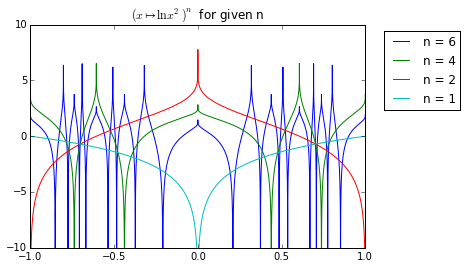

In [3]:
fig, ax = plt.subplots()
def plot_fn(f, label):
    x = np.arange(-1,1,1e-6)
    y = f(x)
    ax.plot(x, y, label=label)

def iterlog2(n):
    def it(x):
        for _ in range(n):
            x = np.log (x * x + 1e-100) # silence div/0 warnings
        return x
    return it

for u in [6, 4, 2, 1]: # messier plots first
    plot_fn(iterlog2(u), "n = {}".format(u))
    
plt.ylim(-10,10)
plt.title(r"$(x\mapsto \ln x^2)^n$ for given n")
save("iter_lows.png", ax.legend(bbox_to_anchor=(1.3, 1)))

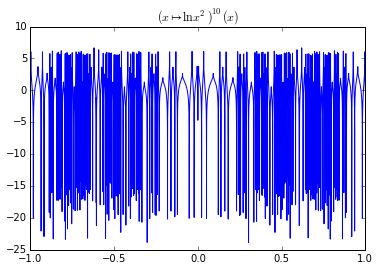

In [4]:
x = np.arange(-1,1,1e-6)
n = 10
plt.plot(x, iterlog2(n)(x), "")
plt.title(r"$(x\mapsto \ln x^2)^{%s}(x)$" % n)
save("iter_10.png")
plt.show()

In [5]:
class histo:
    def __init__(self, bs=0.1):
        self.min = -10
        self.max = 10
        self.step = bs
        self.ys = np.zeros((self.max-self.min)/self.step)
        self.n = 0
    
    def scale(self, x):
        return (x - self.min) / (self.max-self.min) * len(self.ys)

    def add(self, x, weight=1):
        self.n += weight
        ind = self.scale(x)
        if 0 <= ind < len(self.ys):
            self.ys[ind] += weight
    
    def plots(self):
        return np.linspace(self.min + self.step, self.max + self.step, len(self.ys)), self.ys/self.n

def make_ln2(x, n):
    h = histo()
    for _ in range(n):
        x = log(x * x)
        h.add(x)
    return h.plots()

def histogram(x, n):
    x, y = make_ln2(x, n)
    plt.plot(x, y, '-')

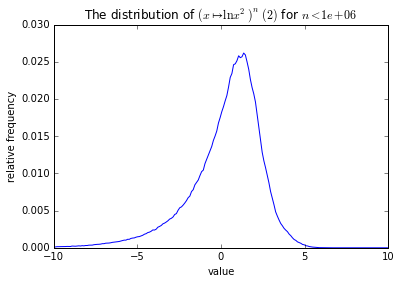

In [6]:
N = 1000000
histogram(2, N)
plt.title(r"The distribution of $(x \mapsto \ln x^2)^n (2)$ for $n < %4.2g$" % N)
plt.xlabel("value")
plt.xlim(-10,10)
plt.ylabel("relative frequency")
save("iter_lots.png")
plt.show()

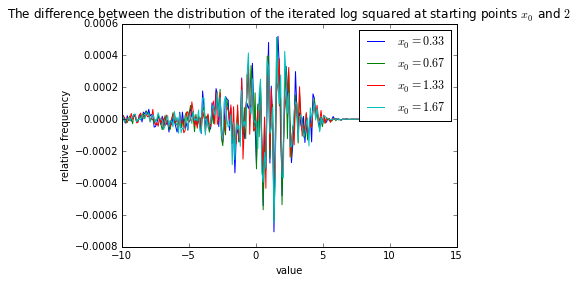

In [7]:
M = 3

x, y_base = make_ln2(2, N)
fig, ax = plt.subplots()

for u in range(1, 2 * M):
    x = u / M
    if x == 1:
        continue
    xs, ys = make_ln2(x, N)
    ax.plot(xs, ys-y_base, label='$x_0 = %10.2f$' % x)

plt.title(r"The difference between the distribution of the iterated log squared at starting points $x_0$ and $2$")
plt.xlabel("value")
plt.ylabel("relative frequency")
save("diffs.png", ax.legend())

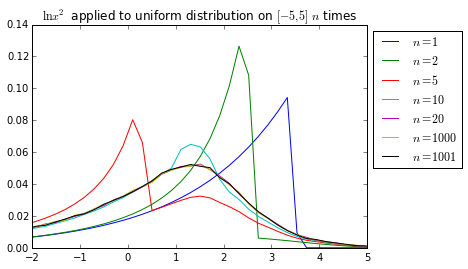

In [8]:
def multivolve(n):
    u = np.linspace(-5,5,200000)
    h = histo(bs=2e-1)
    for v in iterlog2(n)(u):
        h.add(v)
    return h.plots()

fig, ax = plt.subplots()
for n in [1,2,5,10,20,1000,1001]:
    ax.plot(*multivolve(n), label="$n=%s$" % n)

plt.xlim(-2,5)
plt.title(r"$\ln x^2$ applied to uniform distribution on $[-5, 5]$ $n$ times")
save("distro_iter.png", ax.legend(bbox_to_anchor=(1.3, 1)))
plt.show()